<a href="https://colab.research.google.com/github/saraswathikasi/Heart-Disease/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install vecstack

VecStack - is used for implementing stacking . Stacking is an ensemble technique that combines multiple models (base learners) to improve predictive performance by training a meta-model on their outputs.



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc


In [48]:
from collections import Counter
# datapreprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
#data modelling
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
# ensembling
from mlxtend.classifier import StackingCVClassifier

In [51]:
df = pd.read_csv('/content/cleveland_heart_disease_cleaned.csv')

In [52]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [54]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
296,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [56]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [58]:
y = df["target"]
X = df.drop("target",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 107, 0: 130})

In [60]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,nbpred)
nb_acc_score = accuracy_score(y_test,nbpred)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of the Naive Bayes model is:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))


confusion matrix
[[28  2]
 [ 7 23]]


Accuracy of the Naive Bayes model is: 85.0 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        30

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [61]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of the Logistic Regression model is:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confusion matrix
[[28  2]
 [ 8 22]]


Accuracy of the Logistic Regression model is: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [62]:
m3 = 'Random Forest Classifier'
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predicted)
rf_acc_score = accuracy_score(y_test,rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of the Random Forest Classifier model is:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[27  3]
 [ 9 21]]


Accuracy of the Random Forest Classifier model is: 80.0 

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.88      0.70      0.78        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

m4 = 'Extreme Gradient Boosting Classifier'
xgb = XGBClassifier(
    learning_rate=0.01,
    n_estimators=25,
    max_depth=15,
    gamma=0.6,
    subsample=0.52,
    colsample_bytree=0.6,
    reg_lambda=2,
    booster='dart',
    colsample_bylevel=0.6,
    colsample_bynode=0.5
)

xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)

xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("Confusion Matrix:")
print(xgb_conf_matrix)
print("\nAccuracy of the Extreme Gradient Boosting Classifier model is:", xgb_acc_score * 100, '\n')
print(classification_report(y_test, xgb_predicted))


Confusion Matrix:
[[30  0]
 [20 10]]

Accuracy of the Extreme Gradient Boosting Classifier model is: 66.66666666666666 

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        30
           1       1.00      0.33      0.50        30

    accuracy                           0.67        60
   macro avg       0.80      0.67      0.62        60
weighted avg       0.80      0.67      0.62        60



In [64]:
m5 = 'K-Nearest Neighbors Classifier'
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train,y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test,knn_predicted)
knn_acc_score = accuracy_score(y_test,knn_predicted)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of the K-Nearest Neighbors Classifier model is:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confusion matrix
[[28  2]
 [ 9 21]]


Accuracy of the K-Nearest Neighbors Classifier model is: 81.66666666666667 

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.70      0.79        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.81        60
weighted avg       0.83      0.82      0.81        60



In [65]:
m6 = 'Decision Tree Classifier'
dt = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth = 6)
dt.fit(X_train,y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test,dt_predicted)
dt_acc_score = accuracy_score(y_test,dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of the Decision Tree Classifier model is:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confusion matrix
[[23  7]
 [ 8 22]]


Accuracy of the Decision Tree Classifier model is: 75.0 

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.76      0.73      0.75        30

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [66]:
m7 = 'Support Vector Classifier'
svc = SVC(kernel = 'rbf', C = 2)
svc.fit(X_train,y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test,svc_predicted)
svc_acc_score = accuracy_score(y_test,svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of the Support Vector Classifier model is:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confusion matrix
[[27  3]
 [ 8 22]]


Accuracy of the Support Vector Classifier model is: 81.66666666666667 

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        30
           1       0.88      0.73      0.80        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



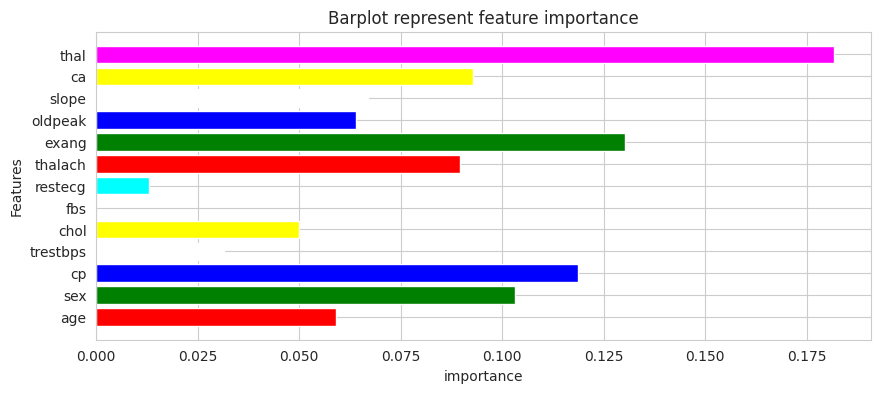

In [67]:
colors = ["red", "green", "blue", "white", "yellow", "magenta", "cyan"]
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance':xgb.feature_importances_})
plt.figure(figsize = (10, 4))
plt.title("Barplot represent feature importance")
plt.xlabel("importance")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color = colors)
plt.show()

In [68]:
# ROC Curve Calculation
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(y_test, lr_predict)
nb_false_positive_rate, nb_true_positive_rate, nb_threshold = roc_curve(y_test, nbpred)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(y_test, rf_predicted)
xgb_false_positive_rate, xgb_true_positive_rate, xgb_threshold = roc_curve(y_test, xgb_predicted)
knn_false_positive_rate, knn_true_positive_rate, knn_threshold = roc_curve(y_test, knn_predicted)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(y_test, dt_predicted)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(y_test, svc_predicted)


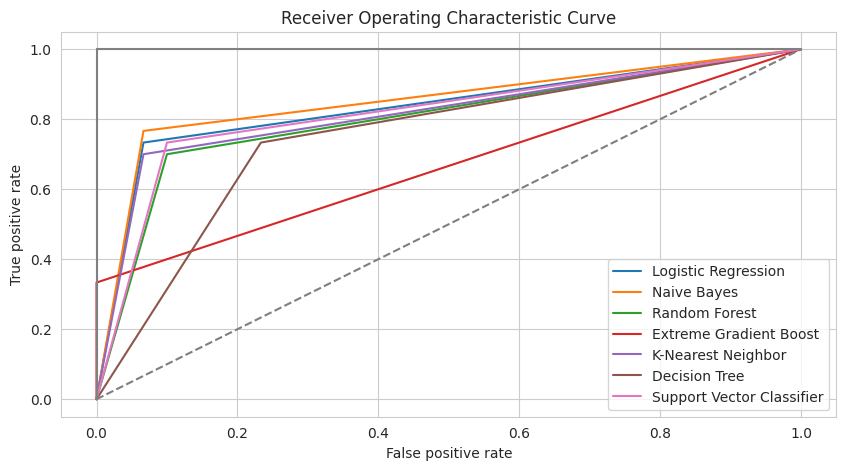

In [69]:
# ROC Curve Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
plt.plot(nb_false_positive_rate, nb_true_positive_rate, label='Naive Bayes')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(xgb_false_positive_rate, xgb_true_positive_rate, label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate, knn_true_positive_rate, label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')

plt.plot([0, 1], [0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.5')
plt.plot([1, 1], c='.5')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


In [70]:
import pandas as pd

model_ev = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Naive Bayes',
        'Random Forest',
        'Extreme Gradient Boost',
        'K-Nearest Neighbour',
        'Decision Tree',
        'Support Vector Machine'
    ],
    'Accuracy': [
        lr_acc_score * 100,
        nb_acc_score * 100,
        rf_acc_score * 100,
        xgb_acc_score * 100,
        knn_acc_score * 100,
        dt_acc_score * 100,
        svc_acc_score * 100
    ]
})

model_ev


,Model,Accuracy
0,Logistic Regression,83.333333
1,Naive Bayes,85.000000
2,Random Forest,80.000000
3,Extreme Gradient Boost,66.666667
4,K-Nearest Neighbour,81.666667
5,Decision Tree,75.000000
6,Support Vector Machine,81.666667


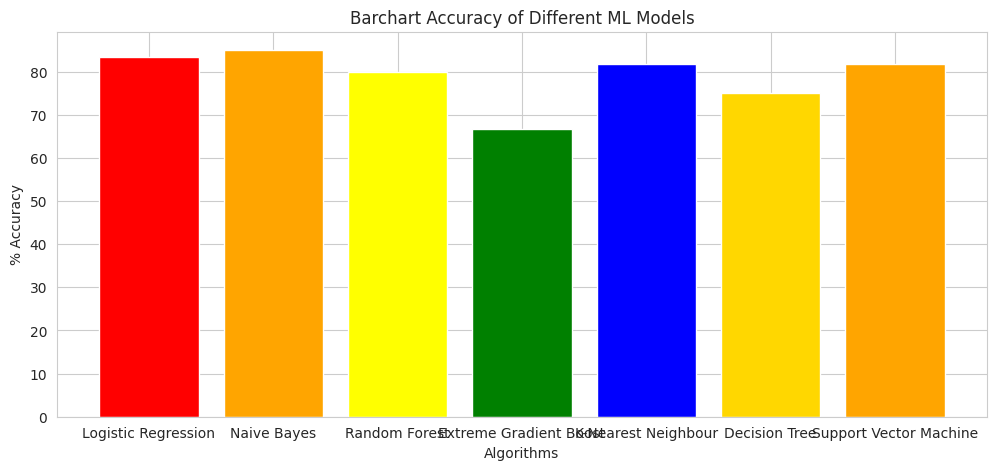

In [71]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'gold', 'orange']

plt.figure(figsize=(12, 5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)
plt.show()

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define base classifiers
nb = GaussianNB()
lr = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)

# Create stacking classifier
stack_model = StackingClassifier(
    estimators=[('nb', nb), ('lr', lr), ('svc', svc)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the model
stack_model.fit(X_train, y_train)

# Predict and evaluate
scv_predicted = stack_model.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)

# Output
print("Confusion Matrix:")
print(scv_conf_matrix)
print("\nAccuracy of the Stacking Classifier model is:", scv_acc_score * 100, '%\n')
print(classification_report(y_test, scv_predicted))


Confusion Matrix:
[[28  2]
 [ 8 22]]

Accuracy of the Stacking Classifier model is: 83.33333333333334 %

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

